## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

In [2]:

# defined the variable list
var_list = ['wrkstat', 'prestige', 'hrs1', 'satisfjob', 'happy', 'marital', 'age']
output_filename = 'selected_gss_data.csv'

# downloads data from all 3 chunks
phase = 0
for k in range(3):
    url = f'https://github.com/DS3001/project_gss/raw/main/gss_chunk_{k+1}.parquet'
    print(f"Downloading chunk {k+1}: {url}")
    df = pd.read_parquet(url)

    available_vars = [var for var in var_list if var in df.columns]
    print(f"Variables found in chunk {k+1}: {available_vars}")

    if not available_vars:
        continue  # skip if no variables found

    df[available_vars].to_csv(output_filename, mode='w' if phase == 0 else 'a',
                              header=(phase == 0), index=False)
    phase = 1


Variables found in chunk 1: ['wrkstat', 'prestige', 'hrs1', 'happy', 'marital', 'age']
Variables found in chunk 2: ['wrkstat', 'prestige', 'hrs1', 'happy', 'marital', 'age']
Variables found in chunk 3: ['wrkstat', 'prestige', 'hrs1', 'happy', 'marital', 'age']


In [3]:
# load filtered csv
df = pd.read_csv(output_filename)
print("Final columns in dataset:", df.columns.tolist())


Final columns in dataset: ['wrkstat', 'prestige', 'hrs1', 'happy', 'marital', 'age']


In [4]:
# drops rows with missing values in important columns

subset_cols = ['wrkstat', 'prestige', 'satisfjob', 'happy']
existing_cols = [col for col in subset_cols if col in df.columns]
df_clean = df.dropna(subset=existing_cols)

In [5]:
# renames long workstat labels to shorter and readable

df_clean['wrkstat_short'] = df_clean['wrkstat'].replace({
    'with a job, but not at work because of temporary illness': 'job but ill',
    'unemployed, laid off, looking for work': 'unemployed',
    'working full time': 'full time',
    'working part time': 'part time',
    'keeping house': 'home',
    'in school': 'student'
})

valid_cats = ['full time', 'part time', 'retired', 'student', 'home', 'unemployed', 'job but ill']
df_filtered = df_clean[df_clean['wrkstat_short'].isin(valid_cats)]

<ipython-input-5-b24ea02c224d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['wrkstat_short'] = df_clean['wrkstat'].replace({


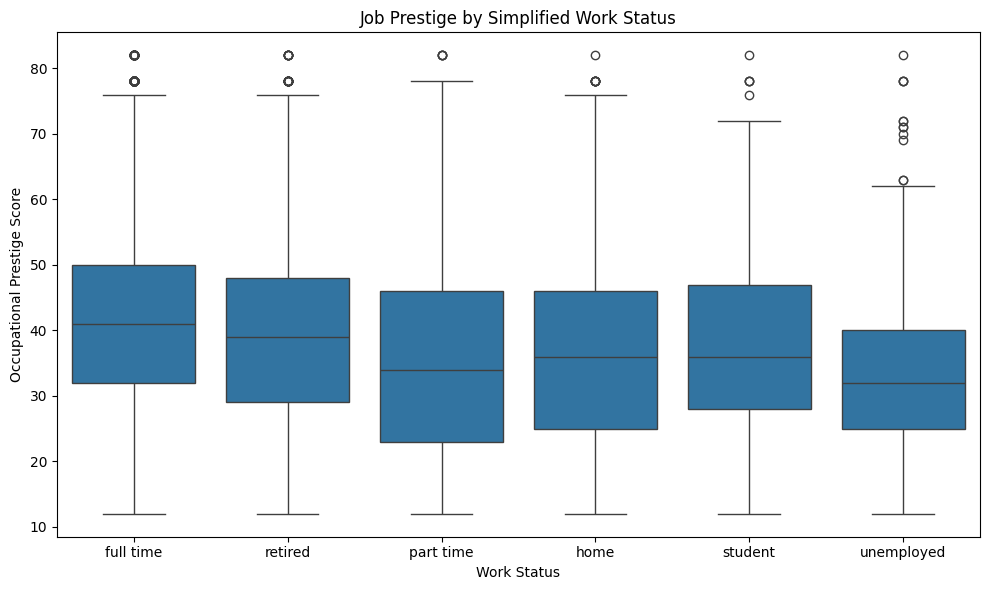

In [6]:
# generates clean visuals and numeric summary: Prestige vs Work status Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='wrkstat_short', y='prestige')
plt.title("Job Prestige by Simplified Work Status")
plt.xlabel("Work Status")
plt.ylabel("Occupational Prestige Score")
plt.tight_layout()
plt.show()


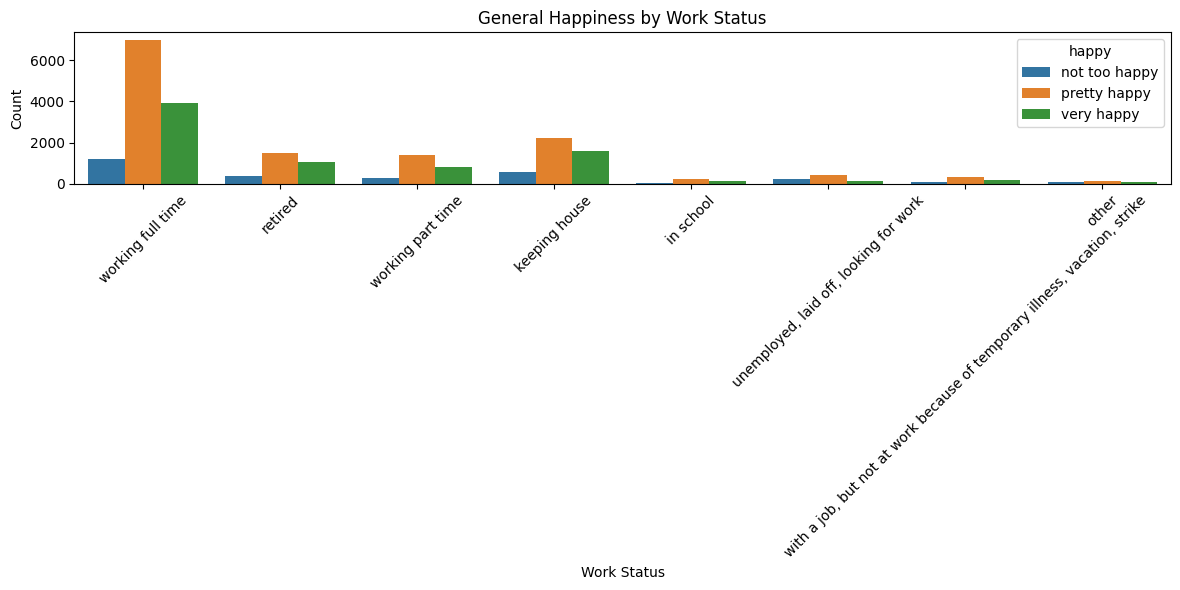

In [7]:
# displays happiness by work status
plt.figure(figsize=(12, 6))
sns.countplot(data=df_clean, x='wrkstat', hue='happy')
plt.xticks(rotation=45)
plt.title("General Happiness by Work Status")
plt.xlabel("Work Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

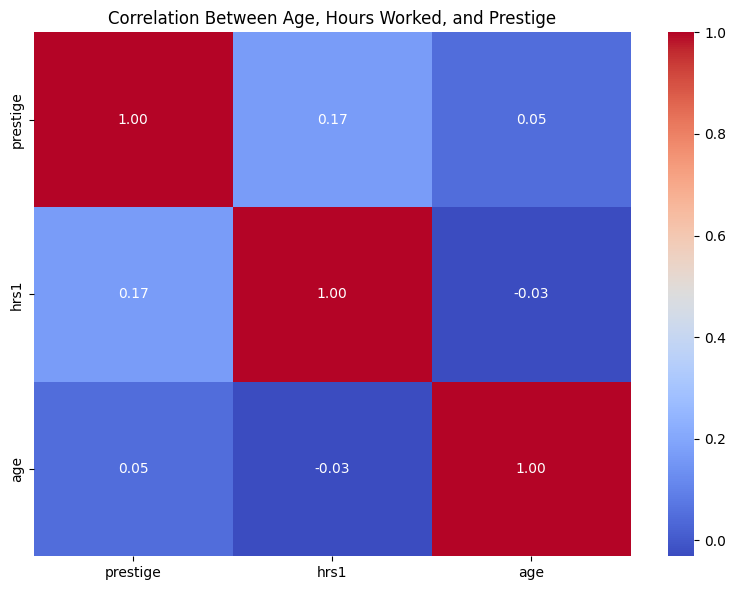

In [8]:
# correlation between numeric variables:
numeric_vars = ['prestige', 'hrs1', 'age']
existing_numeric = [col for col in numeric_vars if col in df_clean.columns]
numeric_df = df_clean[existing_numeric].dropna()

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Age, Hours Worked, and Prestige")
plt.tight_layout()
plt.show()


In [9]:
# summary statistics:
df_clean.describe(include='all')

,wrkstat,prestige,hrs1,happy,marital,age,wrkstat_short
count,24082,24082.000000,13774.000000,24082,24080,23996.000000,24082
unique,8,NaN,NaN,3,5,NaN,8
top,working full time,NaN,NaN,pretty happy,married,NaN,full time
freq,12178,NaN,NaN,13249,14782,NaN,12178
mean,NaN,39.362013,40.551982,NaN,NaN,44.982580,NaN
std,NaN,14.037442,13.832309,NaN,NaN,17.306155,NaN
min,NaN,12.000000,0.000000,NaN,NaN,18.000000,NaN
25%,NaN,30.000000,36.000000,NaN,NaN,30.000000,NaN
50%,NaN,39.000000,40.000000,NaN,NaN,42.000000,NaN
75%,NaN,48.000000,46.000000,NaN,NaN,59.000000,NaN
